In [1]:
import os, sys
root_dir = os.path.dirname(os.path.abspath(''))
if not root_dir in sys.path: sys.path.append(root_dir)

import matplotlib.pyplot as plt
import ipywidgets as widgets
#from IPython.display import display

from general.transformParas import *
#%matplotlib widget

In [2]:
# general parameters
tau_M = 0.01

# excitatory parameters
nu_E = 1.
tau_A = 0.001
tau_N = 0.150
kappa_E = 4

# inhibitory parameters
nu_I = 1.
tau_G = 0.005

tau_M_range=[0.001,0.05]
tau_A_range=[0.0001,0.010]
tau_N_range=[0.001,0.5]
tau_G_range=[0.001,0.05]

nu_E_range=[0.0,5]
nu_I_range=[0.0,5]


tau_M_widget = widgets.FloatSlider(tau_M,min=tau_M_range[0],max=tau_M_range[1],step=0.001,orientation='horizontal',description=r'$\displaystyle \tau_M$',readout_format='.3f')
tau_A_widget = widgets.FloatSlider(tau_A,min=tau_A_range[0],max=tau_A_range[1],step=0.0001,orientation='horizontal',description=r'$\displaystyle \tau_A$',readout_format='.4f')
tau_N_widget = widgets.FloatSlider(tau_N,min=tau_N_range[0],max=tau_N_range[1],step=0.001,orientation='horizontal',description=r'$\displaystyle \tau_N$',readout_format='.3f')
tau_G_widget = widgets.FloatSlider(tau_G,min=tau_G_range[0],max=tau_G_range[1],step=0.001,orientation='horizontal',description=r'$\displaystyle \tau_G$',readout_format='.3f')

nu_E_widget = widgets.FloatSlider(nu_E,min=nu_E_range[0],max=nu_E_range[1],step=0.01,orientation='horizontal',description=r'$\displaystyle \nu_E$')
nu_I_widget = widgets.FloatSlider(nu_I,min=nu_I_range[0],max=nu_I_range[1],step=0.01,orientation='horizontal',description=r'$\displaystyle \nu_I$')

kappa_widget = widgets.FloatSlider(min=0, max=10, value=4, step=0.1)
fig,ax = plt.subplots(2,2,figsize=(7,4))
plt.ion()
r_arr = np.linspace(0,1,101)

h_sigma_V, = ax[0][0].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=2,label='$\\sigma_V$')
h_sigma_V_A, = ax[0][0].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=1,label='$\\sigma_{V_A}$')
h_sigma_V_N, = ax[0][0].plot(r_arr,np.zeros_like(r_arr),color='k',ls='--',lw=1,label='$\\sigma_{V_N}$')
h_sigma_V_G, = ax[0][0].plot(r_arr,np.zeros_like(r_arr),color='r',ls='-',lw=1,label='$\\sigma_{V_G}$')

h_sigma_dV, = ax[0][1].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=2,label='$\\sigma_{\dot{V}}$')
h_sigma_dV_A, = ax[0][1].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=1,label='$\\sigma_{\dot{V}_A}$')
h_sigma_dV_N, = ax[0][1].plot(r_arr,np.zeros_like(r_arr),color='k',ls='--',lw=1,label='$\\sigma_{\dot{V}_N}$')
h_sigma_dV_G, = ax[0][1].plot(r_arr,np.zeros_like(r_arr),color='r',ls='-',lw=1,label='$\\sigma_{\dot{V}_G}$')

h_nu_max, = ax[1][0].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=2,label='$\\nu^{\text{max}}$')

h_nu_max2, = ax[1][0].plot(r_arr,np.zeros_like(r_arr),color='r',ls='--',lw=2,label='$\\nu^{\text{max}}$')

r_A = 1.-r_arr
r_N = r_arr

#ax[0].hlines(10,0,1,color='k',ls='--')
#ax[1].hlines(10,0,1,color='k',ls='--')

#for i,nu in enumerate([0.1,1.,2.]):
def update_plot(nu_E,nu_I,tau_M,tau_A,tau_N,tau_G,kappa):
    
    J_0 = -1 * tau_M
    nu_E /= 60
    nu_I /= 60
    print(nu_E,nu_I)
    
    #nu_I = nu_E*nu_I_scale
    #nu_I = nu_I_scale
    
    add_args = {'nu_E':nu_E,'nu_I':nu_I,'tau_M':tau_M,'tau_A':tau_A,'tau_N':tau_N,'tau_G':tau_G,'kappa_E':kappa,'normalize_height':True}
    tP = transformParas(**add_args)
    #tP.get_nu_max(r_arr)
    
    normalize_height = False
    if normalize_height:
        sigma_I_G = tau_G * J_0**2 * nu_I / 2
        sigma_I_A = J_0**2 * nu_E * \
         ( tau_A * r_A**2/ 2 + (r_A * r_N * tau_A*tau_N) / (tau_A + tau_N) )
        sigma_I_N = J_0**2 * nu_E * \
         ( tau_N * r_N**2/ 2 + (r_A * r_N * tau_A*tau_N) / (tau_A + tau_N) )
    else:
        sigma_I_G = J_0**2 * nu_I / ( 2 * tau_G )
        sigma_I_A = J_0**2 * nu_E * \
         ( r_A**2/( 2*tau_A ) + (r_A * r_N) / (tau_A + tau_N) )
        sigma_I_N = J_0**2 * nu_E * \
         ( r_N**2/( 2*tau_N ) + (r_A * r_N) / (tau_A + tau_N) )

    
    sigma_V_G = sigma_I_G * tau_G / ( tau_G + tau_M )
    sigma_V_A = sigma_I_A * tau_A / ( tau_A + tau_M )
    sigma_V_N = sigma_I_N * tau_N / ( tau_N + tau_M )
    
    sigma_V = np.sqrt(sigma_V_G + (sigma_V_A + sigma_V_N) * kappa)
    #print(sigma_V)
    
    sigma_dV_G = sigma_V_G/(tau_G*tau_M)
    sigma_dV_A = sigma_V_A/(tau_A*tau_M)
    sigma_dV_N = sigma_V_N/(tau_N*tau_M)
    
    sigma_dV = np.sqrt(sigma_dV_G + (sigma_dV_A + sigma_dV_N) * kappa)

#    tP = transformParas(**(add_args|{'nu_E':nu}))
#    tP = transformParas(**(add_args|{'gamma':1.4,'delta':delta}))
#    ax[0].plot(r_arr,tP.get_nu_max(r_arr),color=[col,col,col],lw=1,label='$\\bar{\\nu}=%.1f$Hz'%tP.nu_mean)
    #ax[0].plot(r_arr,sigma_V,color='k',ls='-',lw=1,label='$\\sigma_V$')
    h_sigma_V.set_ydata(sigma_V)
    h_sigma_V_A.set_ydata(np.sqrt(sigma_V_A*kappa))
    h_sigma_V_N.set_ydata(np.sqrt(sigma_V_N*kappa))
    h_sigma_V_G.set_ydata(np.sqrt(sigma_V_G))
    
    h_sigma_dV.set_ydata(sigma_dV)
    h_sigma_dV_A.set_ydata(np.sqrt(sigma_dV_A*kappa))
    h_sigma_dV_N.set_ydata(np.sqrt(sigma_dV_N*kappa))
    h_sigma_dV_G.set_ydata(np.sqrt(sigma_dV_G))
    
    nu_max = 1/(2*np.pi) * sigma_dV/sigma_V
    #print(nu_max)
    h_nu_max.set_ydata(nu_max)
    h_nu_max2.set_ydata(tP.get_nu_max(r_N))
    
    plt.setp(ax[0][0],ylim=[0,max(0.0001,np.nanmax(sigma_V)*1.1)])
    plt.setp(ax[0][1],ylim=[0,max(0.0001,np.nanmax(sigma_dV)*1.1)])
    plt.setp(ax[1][0],ylim=[0,max(0.0001,np.nanmax(nu_max)*1.1)])
    
#    tP = transformParas(**(add_args_2|{'nu_E':nu}))
#    tP = transformParas(**(add_args_2|{'gamma':1.4,'delta':delta}))
#    ax[1].plot(r_arr,tP.get_nu_max(r_arr),color=[col,col,col],lw=1,label='$\\bar{\\nu}=%.1f$Hz'%tP.nu_mean)
    #plt.show()

ax[0][0].legend()
ax[0][1].legend()

#for axx in ax:
#    plt.setp(axx,xlabel='$r_{NMDA}$',ylabel='$\\nu_{max}$')
widgets.interactive(update_plot,nu_E=nu_E_widget,nu_I=nu_I_widget,tau_M=tau_M_widget,tau_A=tau_A_widget,tau_N=tau_N_widget,tau_G=tau_G_widget,kappa=kappa_widget)

#plt.tight_layout()
#fig.savefig("../figures/var_transform.pdf", bbox_inches='tight')
#plt.show()

0.016666666666666666 0.016666666666666666


# Test widgets

Output()

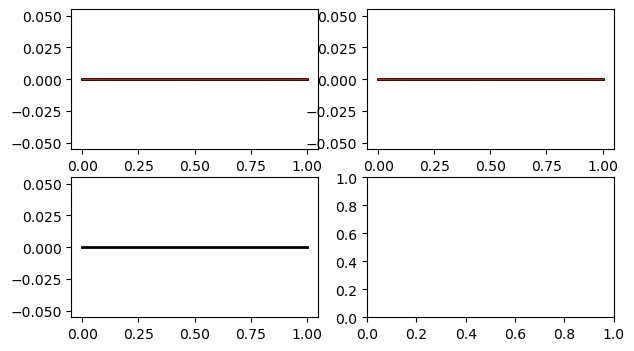

In [3]:
tau_M = widgets.FloatSlider(0.01,min=tau_M_range[0],max=tau_M_range[1],step=0.001,orientation='horizontal',description=r'$\displaystyle \tau_M$',readout_format='.3f')
tau_A = widgets.FloatSlider(0.005,min=tau_A_range[0],max=tau_A_range[1],step=0.001,orientation='horizontal',description=r'$\displaystyle \tau_A$',readout_format='.3f')
tau_N = widgets.FloatSlider(0.2,min=tau_N_range[0],max=tau_N_range[1],step=0.001,orientation='horizontal',description=r'$\displaystyle \tau_N$',readout_format='.3f')
tau_G = widgets.FloatSlider(0.003,min=tau_G_range[0],max=tau_G_range[1],step=0.001,orientation='horizontal',description=r'$\displaystyle \tau_G$',readout_format='.3f')

nu_E = widgets.FloatSlider(nu_E,min=nu_E_range[0],max=nu_E_range[1],step=0.1,orientation='horizontal',description=r'$\displaystyle \nu_E$')
nu_I = widgets.FloatSlider(nu_I,min=nu_I_range[0],max=nu_I_range[1],step=0.1,orientation='horizontal',description=r'$\displaystyle \nu_I$')

plt.ion()

input_widgets = widgets.HBox(
[tau_M, tau_A, tau_N, tau_G, nu_E, nu_I])

plot_output = widgets.Output()

fig,ax = plt.subplots(2,2,figsize=(7,4))
r_arr = np.linspace(0,1,101)

h_sigma_V, = ax[0][0].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=2,label='$\\sigma_V$')
h_sigma_V_A, = ax[0][0].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=1,label='$\\sigma_{V_A}$')
h_sigma_V_N, = ax[0][0].plot(r_arr,np.zeros_like(r_arr),color='k',ls='--',lw=1,label='$\\sigma_{V_N}$')
h_sigma_V_G, = ax[0][0].plot(r_arr,np.zeros_like(r_arr),color='r',ls='-',lw=1,label='$\\sigma_{V_G}$')

h_sigma_dV, = ax[0][1].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=2,label='$\\sigma_{\dot{V}}$')
h_sigma_dV_A, = ax[0][1].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=1,label='$\\sigma_{\dot{V}_A}$')
h_sigma_dV_N, = ax[0][1].plot(r_arr,np.zeros_like(r_arr),color='k',ls='--',lw=1,label='$\\sigma_{\dot{V}_N}$')
h_sigma_dV_G, = ax[0][1].plot(r_arr,np.zeros_like(r_arr),color='r',ls='-',lw=1,label='$\\sigma_{\dot{V}_G}$')

h_nu_max, = ax[1][0].plot(r_arr,np.zeros_like(r_arr),color='k',ls='-',lw=2,label='$\\nu^{\text{max}}$')

r_A = 1.-r_arr
r_N = r_arr

#ax[0].hlines(10,0,1,color='k',ls='--')
#ax[1].hlines(10,0,1,color='k',ls='--')

#for i,nu in enumerate([0.1,1.,2.]):
def update_plot(x):
    print('new:',x)
    J_0 = -1 * tau_M.value
    
    sigma_I_G = J_0**2 * nu_I.value / ( 2 * tau_G.value )
    sigma_I_A = J_0**2 * nu_E.value / ( 2 * tau_A.value) * \
     ( r_A**2 + (r_A * r_N * tau_A.value) / (tau_A.value + tau_N.value) )
    sigma_I_N = J_0**2 * nu_E.value / ( 2 * tau_N.value) * \
     ( r_N**2 + (r_A * r_N * tau_A.value) / (tau_A.value + tau_N.value) )

    
    sigma_V_G = sigma_I_G * tau_G.value / ( tau_G.value + tau_M.value )
    sigma_V_A = sigma_I_A * tau_A.value / ( tau_A.value + tau_M.value )
    sigma_V_N = sigma_I_N * tau_N.value / ( tau_N.value + tau_M.value )
    
    sigma_V = np.sqrt(sigma_V_G + (sigma_V_A + sigma_V_N) * kappa_E)
    #print(sigma_V)
    
    sigma_dV_G = sigma_V_G/(tau_G.value*tau_M.value)
    sigma_dV_A = sigma_V_A/(tau_A.value*tau_M.value)
    sigma_dV_N = sigma_V_N/(tau_N.value*tau_M.value)
    
    sigma_dV = np.sqrt(sigma_dV_G + (sigma_dV_A + sigma_dV_N) * kappa_E)

#    tP = transformParas(**(add_args|{'nu_E':nu}))
#    tP = transformParas(**(add_args|{'gamma':1.4,'delta':delta}))
#    ax[0].plot(r_arr,tP.get_nu_max(r_arr),color=[col,col,col],lw=1,label='$\\bar{\\nu}=%.1f$Hz'%tP.nu_mean)
    #ax[0].plot(r_arr,sigma_V,color='k',ls='-',lw=1,label='$\\sigma_V$')
    h_sigma_V.set_ydata(sigma_V)
    h_sigma_V_A.set_ydata(np.sqrt(sigma_V_A))
    h_sigma_V_N.set_ydata(np.sqrt(sigma_V_N))
    h_sigma_V_G.set_ydata(np.sqrt(sigma_V_G))
    
    h_sigma_dV.set_ydata(sigma_dV)
    h_sigma_dV_A.set_ydata(np.sqrt(sigma_dV_A))
    h_sigma_dV_N.set_ydata(np.sqrt(sigma_dV_N))
    h_sigma_dV_G.set_ydata(np.sqrt(sigma_dV_G))
    
    nu_max = 1/np.pi * sigma_dV/sigma_V
    print(nu_max)
    h_nu_max.set_ydata(nu_max)
    
    plt.setp(ax[0][0],ylim=[0,max(0.1,np.nanmax(sigma_V)*1.1)])
    plt.setp(ax[0][1],ylim=[0,max(0.1,np.nanmax(sigma_dV)*1.1)])
    plt.setp(ax[1][0],ylim=[0,max(0.1,np.nanmax(nu_max)*1.1)])

tau_M.observe(update_plot)

display(input_widgets)
display(plot_output)